## **Upgrade Python**

In [1]:


!apt-get update
!apt-get -y install python3.9


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

## **Installations**

In [2]:
!pip install tensorflow
!pip install keras
!pip install tqdm
!pip install seaborn
!pip install matplotlib

## **Imports**

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D,Dropout,Flatten,MaxPooling2D,Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## **Data Directory**

In [4]:
BASE_DIR = '/content/drive/MyDrive/UTKFace'
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR, image)
  img_components = image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])

  # Append the image_path, age_label, and gender_label
  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)

  0%|          | 0/12418 [00:00<?, ?it/s]

## **Data View**

In [5]:
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)}, Number of image_paths: {len(image_paths)}')

Number of age_labels: 12418, Number of gender_labels: 12418, Number of image_paths: 12418


In [6]:
print(age_labels[:10])
print(gender_labels[:10])
print(image_paths[:10])

[26, 18, 27, 1, 28, 2, 27, 17, 29, 31]
[0, 1, 0, 0, 0, 0, 1, 1, 1, 1]
['/content/drive/MyDrive/UTKFace/26_0_4_20170103235258756.jpg.chip.jpg', '/content/drive/MyDrive/UTKFace/18_1_0_20170109214527742.jpg.chip.jpg', '/content/drive/MyDrive/UTKFace/27_0_0_20170104170103608.jpg.chip.jpg', '/content/drive/MyDrive/UTKFace/1_0_2_20161219151117789.jpg.chip.jpg', '/content/drive/MyDrive/UTKFace/28_0_0_20170120220122514.jpg.chip.jpg', '/content/drive/MyDrive/UTKFace/2_0_4_20161221202918296.jpg.chip.jpg', '/content/drive/MyDrive/UTKFace/27_1_0_20170116221836595.jpg.chip.jpg', '/content/drive/MyDrive/UTKFace/17_1_3_20170104222027959.jpg.chip.jpg', '/content/drive/MyDrive/UTKFace/29_1_1_20170113010931254.jpg.chip.jpg', '/content/drive/MyDrive/UTKFace/31_1_2_20170116191228244.jpg.chip.jpg']


In [7]:
gender_mapping = {
    1: 'Female',
    0: 'Male'
}

In [8]:
print(gender_labels[:10])

[0, 1, 0, 0, 0, 0, 1, 1, 1, 1]


26
0


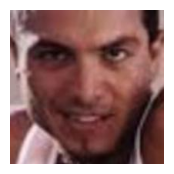

18
1


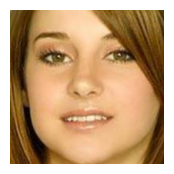

27
0


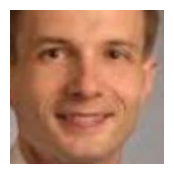

1
0


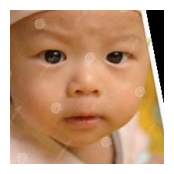

28
0


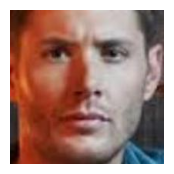

2
0


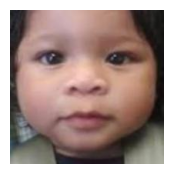

27
1


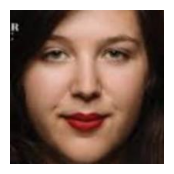

17
1


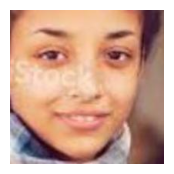

29
1


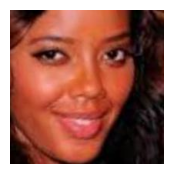

31
1


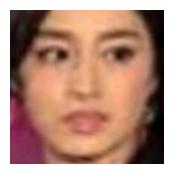

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load and display the first 10 images
for i in range(10):
    image_path = image_paths[i]
    image = cv2.imread(image_path)

    # Display the image using Matplotlib
    plt.figure(figsize=(2, 2))
    print(age_labels[i])
    print(gender_labels[i])
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## **Processing**

In [10]:
import pandas as pd
df = pd.DataFrame()
df['image_path'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head(10)

image_path  age  gender
0  /content/drive/MyDrive/UTKFace/26_0_4_20170103...   26       0
1  /content/drive/MyDrive/UTKFace/18_1_0_20170109...   18       1
2  /content/drive/MyDrive/UTKFace/27_0_0_20170104...   27       0
3  /content/drive/MyDrive/UTKFace/1_0_2_201612191...    1       0
4  /content/drive/MyDrive/UTKFace/28_0_0_20170120...   28       0
5  /content/drive/MyDrive/UTKFace/2_0_4_201612212...    2       0
6  /content/drive/MyDrive/UTKFace/27_1_0_20170116...   27       1
7  /content/drive/MyDrive/UTKFace/17_1_3_20170104...   17       1
8  /content/drive/MyDrive/UTKFace/29_1_1_20170113...   29       1
9  /content/drive/MyDrive/UTKFace/31_1_2_20170116...   31       1

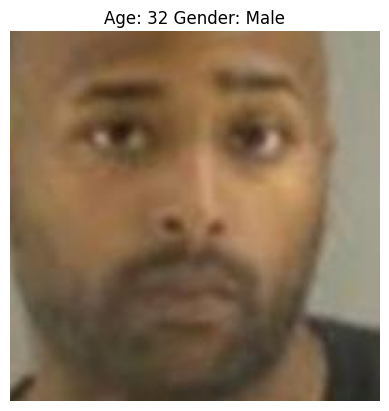

In [11]:
from PIL import Image

rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
gender = df['gender'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
plt.axis('off')
plt.imshow(IMG)

<Axes: xlabel='age', ylabel='Density'>

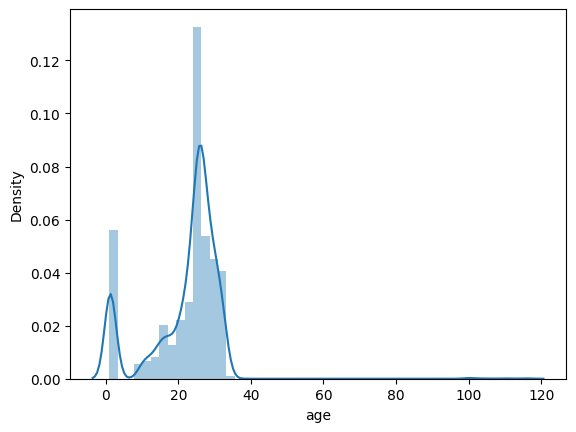

In [12]:
 # Age distribution
 sns.distplot(df['age'])

In [13]:
df['gender'].value_counts()

gender
1    6861
0    5557
Name: count, dtype: int64

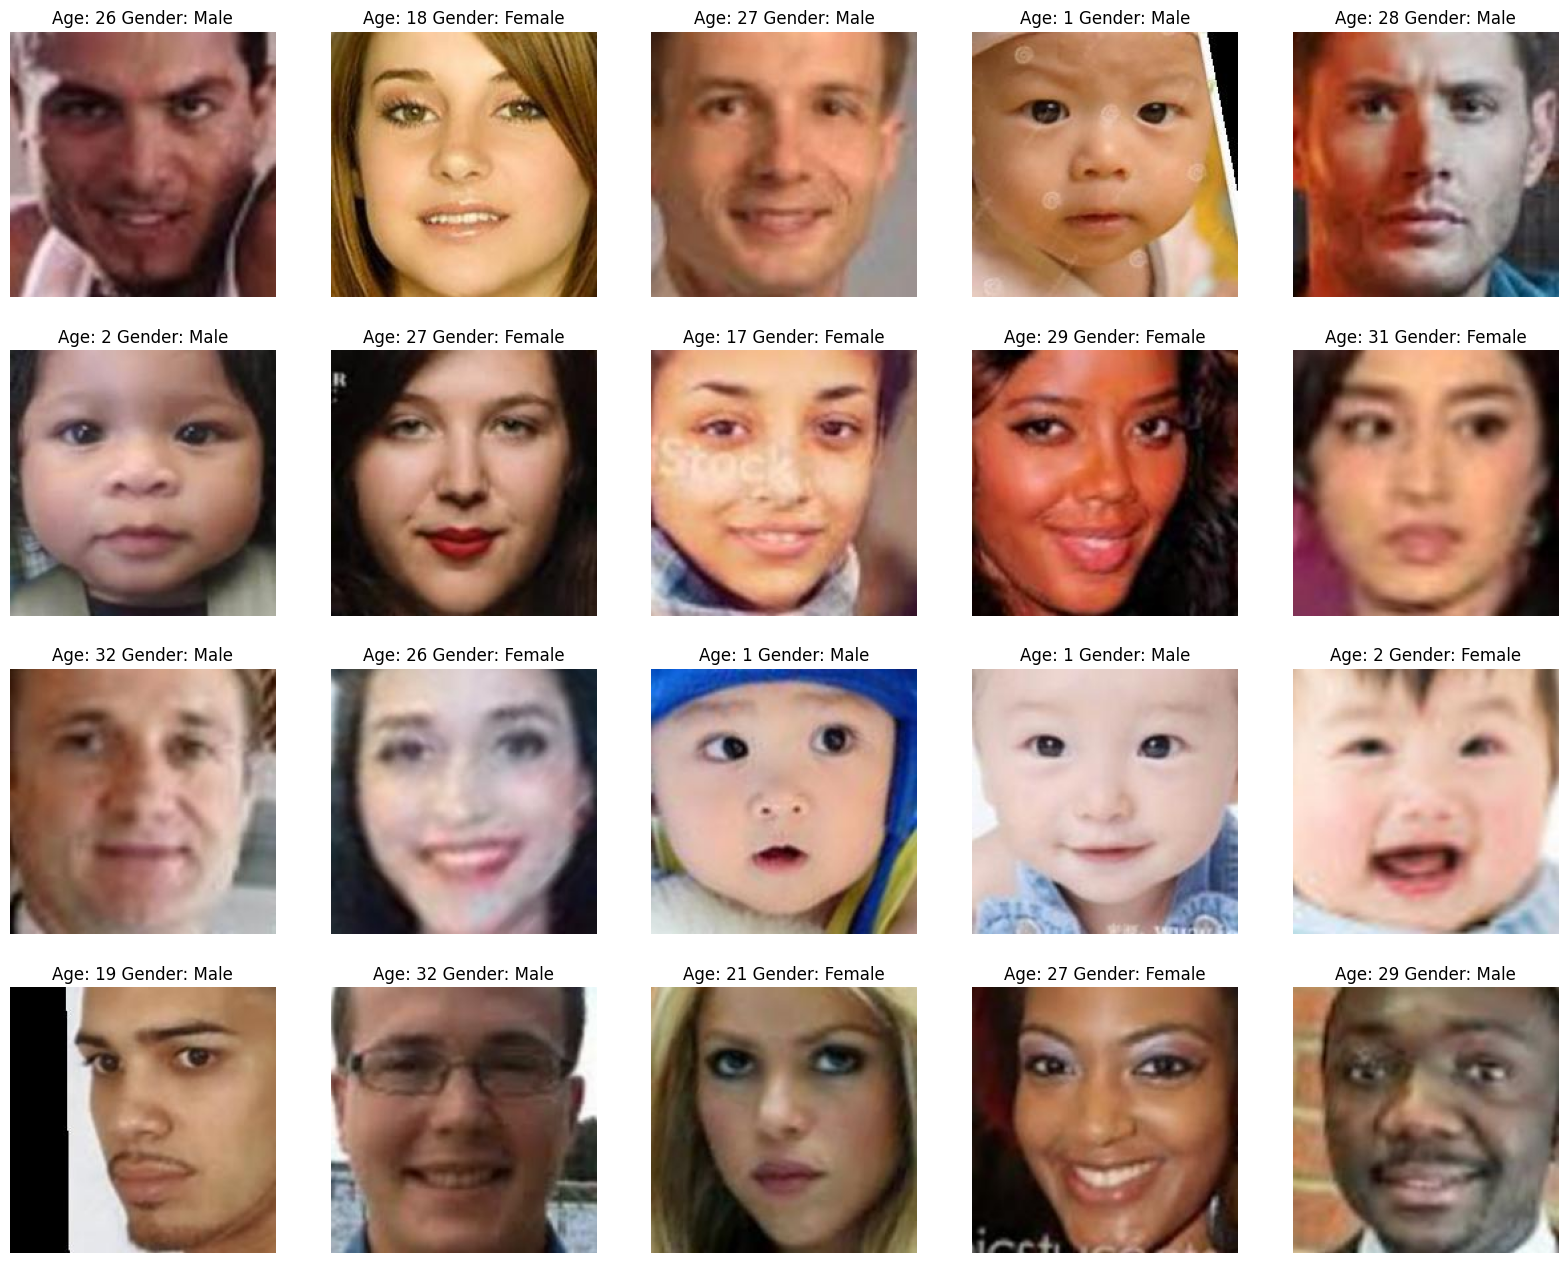

In [14]:
plt.figure(figsize=(20, 20))
samples = df.iloc[0:20]

for index, sample, age, gender in samples.itertuples():
    plt.subplot(5, 5, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
    plt.imshow(img)

In [15]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [16]:
!pip install keras
!pip install tensorflow
from tensorflow.keras.utils import load_img # ensure you are using the correct load_img function
from tqdm import tqdm
import numpy as np
from PIL import Image

def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale') # use color_mode argument instead of grayscale
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_image_features(df['image_path'])

  1%|          | 132/12418 [05:47<127:50:49, 37.46s/it]

In [ ]:
X.shape
X = X / 255.0
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])
print(y_gender[:10])
print(y_age[:10])


## **Trained Model**

In [ ]:
'''
input_shape = (128, 128, 1)
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)
# fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])
model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam', metrics=['accuracy'])
              '''

In [ ]:
# Print summary
model.summary()

In [ ]:
# history = model.fit(x=X, y=[y_gender, y_age],
                #     batch_size=32, epochs=50, validation_split=0.2)

In [ ]:
# model.compile(loss=['binary_crossentropy', 'mae'],optimizer='adam', metrics=['accuracy','mae']) # Added 'mae' for the age output

In [ ]:
# Saving the model in the native Keras format
#  model.save('/content/drive/MyDrive/Models/modelAP.keras')

## **For Fine tuning of model**

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

input_shape = (128, 128, 1)

# Input
inputs = Input(input_shape)

# Convolutional Layers with Batch Normalization
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
bn_1 = BatchNormalization()(conv_1)
max_1 = MaxPooling2D(pool_size=(2, 2))(bn_1)

conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
bn_2 = BatchNormalization()(conv_2)
max_2 = MaxPooling2D(pool_size=(2, 2))(bn_2)

conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
bn_3 = BatchNormalization()(conv_3)
max_3 = MaxPooling2D(pool_size=(2, 2))(bn_3)

conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
bn_4 = BatchNormalization()(conv_4)
max_4 = MaxPooling2D(pool_size=(2, 2))(bn_4)

# Flatten or Global Average Pooling
flatten = GlobalAveragePooling2D()(max_4)

# Fully Connected Layers
dense_1 = Dense(256, activation='relu')(flatten)
dropout_1 = Dropout(0.4)(dense_1)  # Increased dropout rate

dense_2 = Dense(256, activation='relu')(flatten)
dropout_2 = Dropout(0.4)(dense_2)

# Output layers
output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

# Define model
model = Model(inputs=inputs, outputs=[output_1, output_2])

# Compile model with optimizer and metrics
model.compile(
    loss=['binary_crossentropy', 'mae'],
    optimizer=Adam(learning_rate=0.001),
    metrics={'gender_out': 'accuracy', 'age_out': 'mae'}
)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Print summary
model.summary()

# Example of training the model
# history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=50, validation_split=0.2, callbacks=[lr_scheduler])



In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

## **Results for Fine Tune**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score

# Custom F1-score metric
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

def precision_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + tf.keras.backend.epsilon())

def recall_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + tf.keras.backend.epsilon())

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss=['binary_crossentropy', 'mean_squared_error'],  # For gender and age
              metrics={'gender_output': ['accuracy', precision_m, recall_m, f1_m],
                       'age_output': 'mae'})

# Train the model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=10, validation_split=0.2)

# Saving the model in the native Keras format
model.save('/content/drive/MyDrive/Models/modelAP2.keras')

# Plot and save accuracy and loss graphs
def plot_and_save_graphs(history, save_dir='/content/drive/MyDrive/Models/'):
    # Plot accuracy for gender prediction
    plt.plot(history.history['gender_output_accuracy'], label='Gender Accuracy (Training)')
    plt.plot(history.history['val_gender_output_accuracy'], label='Gender Accuracy (Validation)')
    plt.title('Gender Prediction Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.savefig(save_dir + 'gender_accuracy.png')  # Save the plot
    plt.show()

    # Plot F1-score for gender prediction
    plt.plot(history.history['gender_output_f1_m'], label='Gender F1 Score (Training)')
    plt.plot(history.history['val_gender_output_f1_m'], label='Gender F1 Score (Validation)')
    plt.title('Gender Prediction F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend(loc='upper left')
    plt.savefig(save_dir + 'gender_f1_score.png')  # Save the plot
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'], label='Loss (Training)')
    plt.plot(history.history['val_loss'], label='Loss (Validation)')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    plt.savefig(save_dir + 'loss.png')  # Save the plot
    plt.show()

# Call the function to save graphs
plot_and_save_graphs(history)

# Save history data to CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv('/content/drive/MyDrive/Models/training_history.csv', index=False)


## **Load the Model and Test**

In [24]:
from google.colab import drive
from tensorflow.keras.models import load_model

# Mount Google Drive
# drive.mount('/content/drive')

# Specify the path to your model in Google Drive
model_path = '/content/drive/MyDrive/Models/modelAP.keras'

# Load the model
model = load_model(model_path)

print("Model loaded successfully.")

Model loaded successfully.


In [25]:
model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam', metrics=['accuracy','mae'])

In [26]:
from tensorflow.keras.utils import load_img # import load_img from the updated location
from PIL import Image # Import the Image module from Pillow
import numpy as np # Import numpy and alias it as np

def get_image_features(image):
  img = load_img(image, color_mode="grayscale") # Use color_mode and set it to grayscale
  img = img.resize((128, 128), Image.ANTIALIAS)
  img = np.array(img)
  img = img.reshape(1, 128, 128, 1)
  img = img / 255.0
  return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


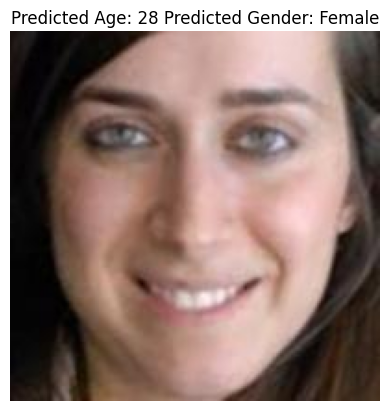

In [27]:
img_to_test = '/content/drive/MyDrive/image2.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)

# Define the gender_mapping dictionary
gender_mapping = {0: 'Male', 1: 'Female'} # Assuming 0 represents Female and 1 represents Male

gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

# Import the matplotlib library and assign it to the plt alias
import matplotlib.pyplot as plt

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

In [28]:
import os # Import the os module
import random
from tqdm import tqdm # Assuming tqdm is used for a progress bar

BASE_DIR_1 = '/content/drive/MyDrive/UTKFace'
age_labels_1 = []
gender_labels_1 = []
image_paths_1 = []

image_filenames_1 = os.listdir(BASE_DIR_1)
random.shuffle(image_filenames_1)

for image in tqdm(image_filenames_1):
  image_path_1 = os.path.join(BASE_DIR_1, image)
  img_components_1 = image.split('_')
  age_label_1 = int(img_components_1[0])
  gender_label_1 = int(img_components_1[1])

  # Append the image_path, age_label, and gender_label
  age_labels_1.append(age_label_1)
  gender_labels_1.append(gender_label_1)
  image_paths_1.append(image_path_1)

100%|██████████| 12418/12418 [00:00<00:00, 265535.90it/s]


In [29]:
age_labels_1[:5]

[28, 28, 25, 1, 26]

28
0


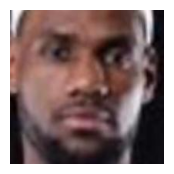

28
0


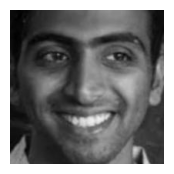

25
1


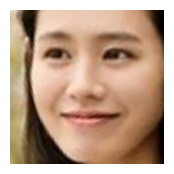

1
0


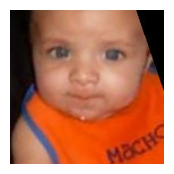

26
0


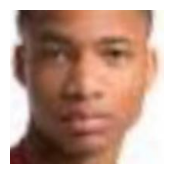

22
0


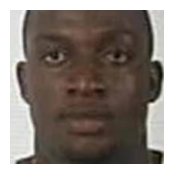

26
1


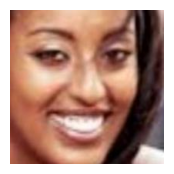

24
1


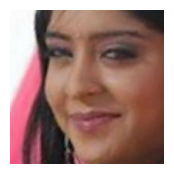

25
1


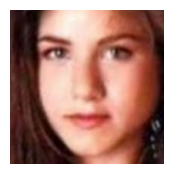

18
0


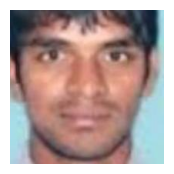

In [30]:
import cv2
import matplotlib.pyplot as plt

# Load and display the first 10 images
for i in range(10):
    image_path_1 = image_paths_1[i]
    image = cv2.imread(image_path_1)

    # Display the image using Matplotlib
    plt.figure(figsize=(2, 2))
    print(age_labels_1[i])
    print(gender_labels_1[i])
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [31]:
image_paths_1[0]

'/content/drive/MyDrive/UTKFace/28_0_1_20170116193402600.jpg.chip.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Actual Age: 28 Actual Gender: 0


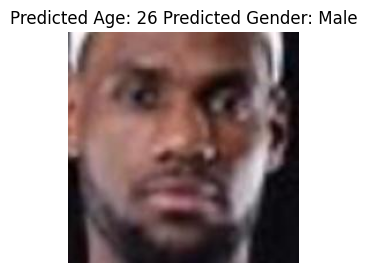

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Actual Age: 28 Actual Gender: 0


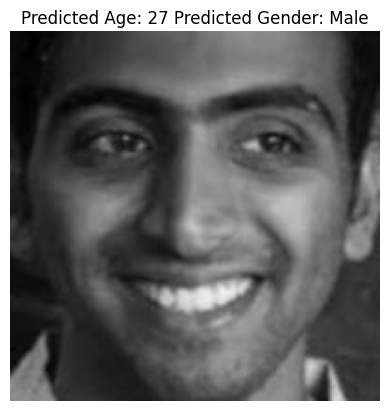

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Actual Age: 25 Actual Gender: 1


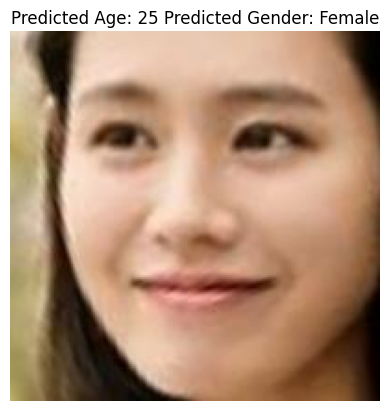

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Actual Age: 1 Actual Gender: 0


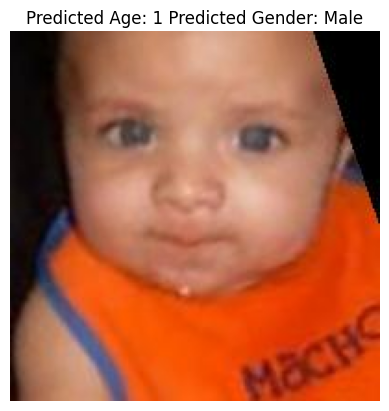

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Actual Age: 26 Actual Gender: 0


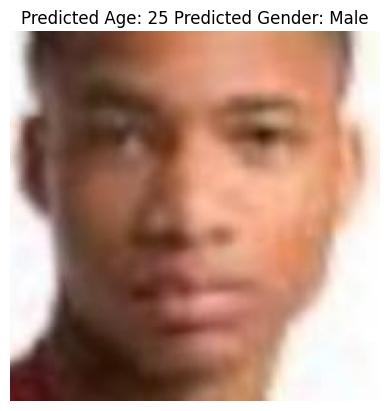

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Actual Age: 22 Actual Gender: 0


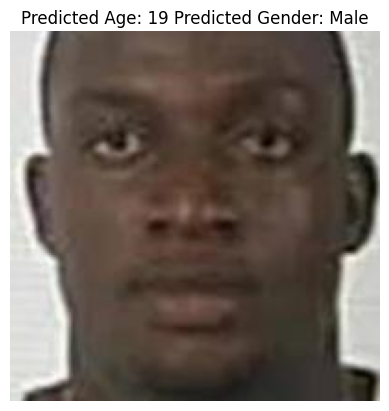

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Actual Age: 26 Actual Gender: 1


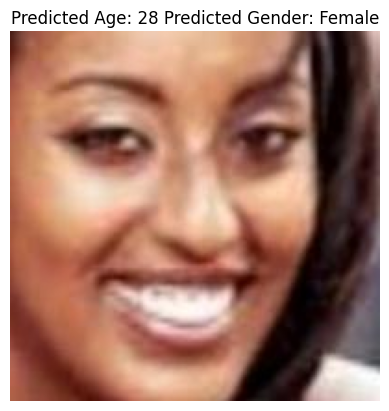

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Actual Age: 24 Actual Gender: 1


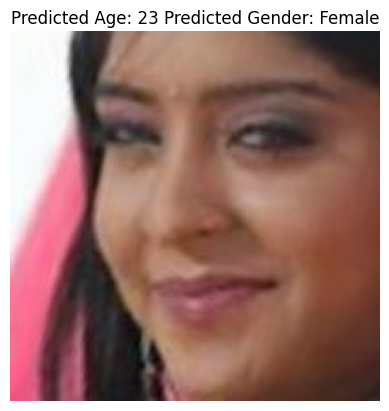

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Actual Age: 25 Actual Gender: 1


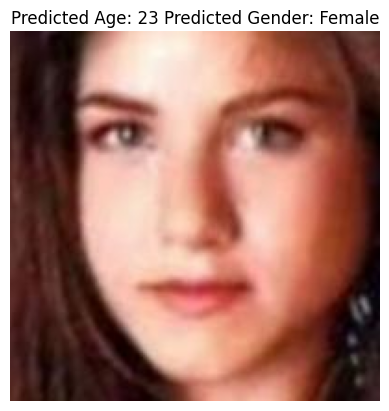

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Actual Age: 18 Actual Gender: 0


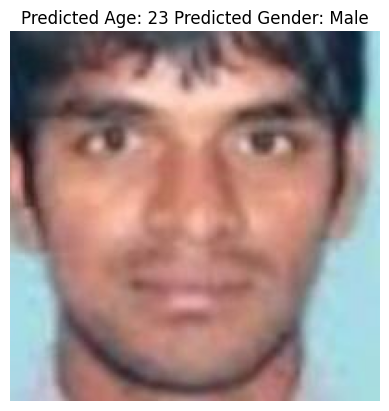

In [32]:
plt.figure(figsize=(3,3))
for i in range(10):
    img_to_test = image_paths_1[i]  # Use the current index 'i' to select a different image
    plt.imshow(np.array(load_img(img_to_test)))
    features = get_image_features(img_to_test)
    pred = model.predict(features)
    gender = gender_mapping[round(pred[0][0][0])]
    age = round(pred[1][0][0])

    plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
    print(f'Actual Age: {age_labels_1[i]} Actual Gender: {gender_labels_1[i]}')
    plt.axis('off')
    plt.show()

In [ ]:
'''
import os
import shutil
from tqdm import tqdm
import random

# Source and destination folders
validation_folder = '/content/drive/MyDrive/validation'  # Replace with your actual validation folder
destination_folder = '/content/drive/MyDrive/testing'  # Replace with your desired destination folder

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Get a list of all image files in the validation folder
image_files = [f for f in os.listdir(validation_folder) if os.path.isfile(os.path.join(validation_folder, f))]

# Select 100 random images
selected_images = random.sample(image_files, 100)

# Copy the selected images to the destination folder
for image in tqdm(selected_images):
    source_path = os.path.join(validation_folder, image)
    destination_path = os.path.join(destination_folder, image)
    shutil.copy(source_path, destination_path)

print("100 images copied successfully!") '''


In [ ]:
'''
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the saved model
model = load_model('/content/drive/MyDrive/Models/modelAP.keras')

# Mapping gender prediction to labels
gender_mapping = {0: 'Male', 1: 'Female'}
img_path='/content/drive/MyDrive/image2.jpg'
# Function to preprocess the image and extract features
def get_image_features(img_path):
    img = load_img(img_path, target_size=(128, 128), color_mode='grayscale')  # Changed target size to 128x128 and converted to grayscale
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Lists to hold true and predicted values
true_genders = []
predicted_genders = []
true_ages = []
predicted_ages = []

# Loop over all test images
for i, img_path in enumerate(image_paths_1):
    # Preprocess image and predict
    features = get_image_features(img_path)
    pred = model.predict(features)

    # Extract predictions
    predicted_gender = round(pred[0][0][0])
    predicted_age = round(pred[1][0][0])

    # Append to lists
    predicted_genders.append(predicted_gender)
    predicted_ages.append(predicted_age)
    true_genders.append(gender_labels_1[i])  # Assuming gender_labels_1 is 0 for Male, 1 for Female
    true_ages.append(age_labels_1[i])

# Convert lists to numpy arrays
true_genders = np.array(true_genders)
predicted_genders = np.array(predicted_genders)
true_ages = np.array(true_ages)
predicted_ages = np.array(predicted_ages)

# Calculate metrics for gender classification
gender_accuracy = accuracy_score(true_genders, predicted_genders)
gender_f1 = f1_score(true_genders, predicted_genders, average='binary')
gender_precision = precision_score(true_genders, predicted_genders, average='binary')
gender_recall = recall_score(true_genders, predicted_genders, average='binary')

# Calculate Mean Absolute Error for age prediction (regression task)
from sklearn.metrics import mean_absolute_error
age_mae = mean_absolute_error(true_ages, predicted_ages)

# Print the results
print(f'Gender Accuracy: {gender_accuracy * 100:.2f}%')
print(f'Gender F1 Score: {gender_f1:.2f}')
print(f'Gender Precision: {gender_precision:.2f}')
print(f'Gender Recall: {gender_recall:.2f}')
print(f'Age Mean Absolute Error: {age_mae:.2f} years')'''


## **Age and gender Predict**

In [33]:
!pip install gradio

In [63]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

# Load the saved model
model = load_model('/content/drive/MyDrive/Models/modelAP.keras')

# Mapping gender prediction to labels
gender_mapping = {0: 'Male', 1: 'Female'}

# Target size for the model input
target_size = (128, 128)  # Change this to the target size your model expects

def predict_age_gender(image):
    # Open the image and convert to grayscale
    img = Image.open(image).convert('L')  # Convert to grayscale
    img = img.resize(target_size, Image.ANTIALIAS)  # Resize to target size

    # Convert image to array and preprocess
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Predict age and gender
    pred = model.predict(img_array)
    predicted_gender = gender_mapping[round(pred[0][0][0])]
    predicted_age = round(pred[1][0][0])

    return predicted_age # predicted_gender

# Create Gradio interface
# Changed type to filepath
iface = gr.Interface(
    fn=predict_age_gender,
    inputs=gr.Image(type='filepath', label='Upload an Image'),
    outputs=gr.Textbox(label='Predicted Age'),
    title='Age and Gender Prediction',
    description='Upload a grayscale image to get predictions for age and gender.'
)

# Launch the interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c1263f04932cd63ea7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [79]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

# Load the saved model
gender_model = load_model('/content/drive/MyDrive/Models/model11.keras')

# Target size for the model input
gender_target_size = (200, 200)  # Adjust to your gender model's input size

# Mapping gender prediction to labels
gender_mapping = {0: 'Male', 1: 'Female'}

def preprocess_image_for_gender(image):
    # Convert to RGB
    img = image.convert('RGB')  # Convert to RGB
    img = img.resize(gender_target_size)  # Resize to target size

    # Convert image to array and preprocess
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    return img_array

def predict_gender(image_path):
    # Load the image from the file path if it's a string
    if isinstance(image_path, str):
        image = Image.open(image_path)
    else:
        image = image_path  # In case it's already an Image object

    # Preprocess and predict gender
    gender_img_array = preprocess_image_for_gender(image)
    gender_pred = gender_model.predict(gender_img_array)
    predicted_gender = 'Female' if gender_pred[0][0] > 0.5 else 'Male'

    # Print and return the predicted gender
    print(predicted_gender)
    return predicted_gender

# Create Gradio interface
iface = gr.Interface(
    fn=predict_gender,
    inputs=gr.Image(type='filepath', label='Upload an Image'),
    outputs=gr.Textbox(label='Predicted Gender'),
    title='Age and Gender Prediction',
    description='Upload an image to predict gender.'
)

# Launch the interface
iface.launch(debug=True)



Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://fbe746153f14a345ae.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Female
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7871 <> https://fbe746153f14a345ae.gradio.live


## **Model to Predict Age, Gender and Race**


In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from tensorflow.keras.models import load_model

# Load the model saved in the native Keras format
model = load_model('/content/drive/MyDrive/Models/model11.keras')

print("Model loaded successfully in Keras format.")
def preprocess_and_predict(image_path, model):
    # Load the image
    img = cv2.imread(image_path)

    # Convert to RGB (if needed)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to 200x200 pixels (or your model's input size)
    img = cv2.resize(img, (200, 200))

    # Normalize the pixel values to the range [0, 1]
    img = img / 255.0

    # Expand dimensions to match the model's expected input shape (1, 200, 200, 3)
    img = np.expand_dims(img, axis=0)

    # Predict using the trained model
    predictions = model.predict(img)

    # Return the predictions for age, gender, and race
    return predictions

    # Example of usage
image_path = '/content/drive/MyDrive/image2.jpg'
age_pred, gender_pred, race_pred = preprocess_and_predict(image_path, model)

# Interpreting the predictions
predicted_age = age_pred[0][0]
predicted_gender = 'Female' if gender_pred[0][0] > 0.5 else 'Male'
predicted_race = 'White' if race_pred[0][0] > 0.5 else 'Black'

print(f'Predicted Age: {predicted_age:.2f}')
print(f'Predicted Gender: {predicted_gender}')
print(f'Predicted Race: {predicted_race}')


Model loaded successfully in Keras format.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Age: 101.73
Predicted Gender: Male
Predicted Race: Black


## **Gradio Interface**

In [84]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

# Load the saved model
model = load_model('/content/drive/MyDrive/Models/modelAP.keras')

# Mapping gender prediction to labels
gender_mapping = {0: 'Male', 1: 'Female'}

# Target size for the model input
target_size = (128, 128)  # Change this to the target size your model expects

def predict_age_gender(image):
    # Open the image and convert to grayscale
    img = Image.open(image).convert('L')  # Convert to grayscale
    img = img.resize(target_size, Image.ANTIALIAS)  # Resize to target size

    # Convert image to array and preprocess
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Predict age and gender
    pred = model.predict(img_array)
    predicted_gender = gender_mapping[round(pred[0][0][0])]
    predicted_age = round(pred[1][0][0])

    return predicted_age, predicted_gender

# Create Gradio interface
# Changed type to filepath
iface = gr.Interface(
    fn=predict_age_gender,
    inputs=gr.Image(type='filepath', label='Upload an Image'),
    outputs=[gr.Textbox(label='Predicted Age'), gr.Textbox(label='Predicted Gender')],
    title='Age and Gender Prediction',
    description='Upload a grayscale image to get predictions for age and gender.'
)

# Launch the interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4fa2f74622018dcd46.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## **Hugging Face**

In [91]:
""" !pip install huggingface_hub


In [95]:
"""
from huggingface_hub import notebook_login

notebook_login()


In [96]:
""" model.save('modelAP.keras')  # Save your model


In [ ]:
"""
from huggingface_hub import HfApi, Repository

# Repository name and path
repo_name = "Age-gender-prediction"
repo_url = HfApi().create_repo(repo_name, private=False)

# Initialize repository
repo = Repository(local_dir=repo_name, clone_from=repo_url)

# Save model and Gradio app script in the repo directory
model.save(f"./{repo_name}/modelAP.keras")

# Write the Gradio script (current Gradio code) to the repo
with open(f"./{repo_name}/app.py", "w") as f:
    f.write("""
    import gradio as gr
    import numpy as np
    from tensorflow.keras.models import load_model
    from tensorflow.keras.preprocessing.image import img_to_array
    from PIL import Image

    model = load_model('./modelAP.keras')
    gender_mapping = {0: 'Male', 1: 'Female'}
    target_size = (128, 128)

    def predict_age_gender(image):
        img = Image.open(image).convert('L')
        img = img.resize(target_size)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
        pred = model.predict(img_array)
        predicted_gender = gender_mapping[round(pred[0][0][0])]
        predicted_age = round(pred[1][0][0])
        return predicted_age, predicted_gender

    iface = gr.Interface(
        fn=predict_age_gender,
        inputs=gr.Image(type='filepath', label='Upload an Image'),
        outputs=[gr.Textbox(label='Predicted Age'), gr.Textbox(label='Predicted Gender')],
        title='Age and Gender Prediction',
        description='Upload a grayscale image to get predictions for age and gender.'
    )
    iface.launch()
    """)

# Add and push the changes to the repo
repo.git_add(auto_lfs_track=True)  # Tracks large files (like models)
repo.git_commit("Initial commit")
repo.git_push()
"""